In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt

Alina Florencia Karuniawati 23102010073

In [3]:
df = pd.read_csv('database.csv')
pd.options.display.max_columns = None
display(df)

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property,NaN
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road,NaN
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property,NaN
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,Jack,Rose,19,Captain,Volunteer,"Dec 19, 2015","Dec 19, 2015",Disorientation,Suffocation,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential,NaN
2001,Stacy,Crawford,47,Firefighter,Volunteer,"Dec 19, 2015","Dec 19, 2015",Stress/Overexertion,Heart Attack,Training,Not on Scene,No,NaN,NaN
2002,Willie,Ratliff,66,Captain,Career,"Dec 21, 2015","Dec 21, 2015",Stress/Overexertion,Heart Attack,On-Duty,Not on Scene,No,NaN,NaN
2003,Louis,Patti,67,Fire Police Officer,Volunteer,"Dec 6, 2015","Dec 22, 2015",Stress/Overexertion,Stroke,On-Duty,Not on Scene,No,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   First Name        2005 non-null   object
 1   Last Name         2004 non-null   object
 2   Age               1646 non-null   object
 3   Rank              1998 non-null   object
 4   Classification    2002 non-null   object
 5   Date of Incident  2004 non-null   object
 6   Date of Death     2005 non-null   object
 7   Cause Of Death    1995 non-null   object
 8   Nature Of Death   2002 non-null   object
 9   Duty              2002 non-null   object
 10  Activity          1996 non-null   object
 11  Emergency         2005 non-null   object
 12  Property Type     1800 non-null   object
 13  Unnamed: 13       1 non-null      object
dtypes: object(14)
memory usage: 219.4+ KB


Berdasarkan informasi di atas dapat dilihat ada beberapa kolom yang tipe datanya masih tidak sesuai dan terdapat missing value, sehingga diperlukan data cleaning

# Data Cleaning

In [5]:
df['Cause Of Death'].unique()

array(['Stress/Overexertion', 'Trapped', 'Fall', 'Impact', 'Exposure',
       'Vehicle Collision', nan, 'Other', 'Collapse', 'Dec 1, 2003',
       'Assault', 'Disorientation', 'Unknown', 'Smoke', 'Contact'],
      dtype=object)

In [6]:
df[df['Cause Of Death']=='Dec 1, 2003']

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type,Unnamed: 13
761,Nadar,NaN,Hammett,29,Firefighter/EMT,Career,"Dec 1, 2003","Dec 1, 2003",Impact,No,Trauma,Personal Vehicle Driver/Passenger,Training,Street/Road


## Membenarkan Data di Index ke 761 yang tertukar

In [7]:
df['Last Name']=df['Last Name'].fillna('Hammett')

In [8]:
df['Age'] = df['Age'].replace('Hammett','29')

In [9]:
df['Rank'] = df['Rank'].replace('29','Firefighter/EMT')

In [10]:
df['Classification'] = df['Classification'].replace('Firefighter/EMT','Career')

In [11]:
df['Date of Incident'] = df['Date of Incident'].replace('Career','Dec 1, 2003')

In [12]:
df['Cause Of Death'] = df['Cause Of Death'].replace('Dec 1, 2003','Impact')

In [13]:
df['Duty'] = df['Duty'].replace('No','Training')

In [14]:
df['Nature Of Death'] = df['Nature Of Death'].replace('Impact','Trauma')

In [15]:
df['Activity'] = df['Activity'].replace('Trauma','Personal Vehicle Driver/Passenger')

In [16]:
df['Emergency'] = df['Emergency'].replace('Personal Vehicle Driver/Passenger','No')

In [17]:
df['Property Type'] = df['Property Type'].replace('Training','Street/Road')

In [18]:
df.iloc[761]

First Name                                     Nadar 
Last Name                                     Hammett
Age                                                29
Rank                                  Firefighter/EMT
Classification                                 Career
Date of Incident                          Dec 1, 2003
Date of Death                             Dec 1, 2003
Cause Of Death                                 Impact
Nature Of Death                                Trauma
Duty                                         Training
Activity            Personal Vehicle Driver/Passenger
Emergency                                          No
Property Type                             Street/Road
Unnamed: 13                               Street/Road
Name: 761, dtype: object

## Membuang Kolom Unnamed: 13

In [19]:
df.drop('Unnamed: 13',axis='columns', inplace=True)

In [20]:
df

,First Name,Last Name,Age,Rank,Classification,Date of Incident,Date of Death,Cause Of Death,Nature Of Death,Duty,Activity,Emergency,Property Type
0,Robert,Pollard,64,Firefighter,Volunteer,"Dec 31, 1999","Jan 1, 2000",Stress/Overexertion,Stroke,Response,Vehicle Passenger,Yes,Outdoor Property
1,Lee,Purdy,57,Pump Operator/Inspector,Volunteer,"Jan 8, 2000","Jan 8, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential
2,Ronald,Osadacz,36,First Assistant Chief,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,Response,Advance Hose Lines/Fire Attack,Yes,Street/Road
3,Allen,Streeter,58,Firefighter,Volunteer,"Jan 11, 2000","Jan 11, 2000",Stress/Overexertion,Heart Attack,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Outdoor Property
4,Gary,"Bankert, Sr",37,Firefighter,Volunteer,"Jan 15, 2000","Jan 15, 2000",Trapped,Suffocation,Training,Other,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,Jack,Rose,19,Captain,Volunteer,"Dec 19, 2015","Dec 19, 2015",Disorientation,Suffocation,On-Scene Fire,Advance Hose Lines/Fire Attack,Yes,Residential
2001,Stacy,Crawford,47,Firefighter,Volunteer,"Dec 19, 2015","Dec 19, 2015",Stress/Overexertion,Heart Attack,Training,Not on Scene,No,NaN
2002,Willie,Ratliff,66,Captain,Career,"Dec 21, 2015","Dec 21, 2015",Stress/Overexertion,Heart Attack,On-Duty,Not on Scene,No,NaN
2003,Louis,Patti,67,Fire Police Officer,Volunteer,"Dec 6, 2015","Dec 22, 2015",Stress/Overexertion,Stroke,On-Duty,Not on Scene,No,NaN


## Mengubah Tipe Data Age dari Object Menjadi Float

In [21]:
df['Age'] = df['Age'].astype('float', errors='ignore')

## Mengubah Tipe Data Date of Death dan Date of Incident Menjadi Datetime

In [22]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])

## Mengambil Kolom yang Digunakan Untuk Analisis

In [23]:
df1 = df[['Nature Of Death','Age','Cause Of Death']]

In [24]:
df1

,Nature Of Death,Age,Cause Of Death
0,Stroke,64.0,Stress/Overexertion
1,Heart Attack,57.0,Stress/Overexertion
2,Heart Attack,36.0,Stress/Overexertion
3,Heart Attack,58.0,Stress/Overexertion
4,Suffocation,37.0,Trapped
...,...,...,...
2000,Suffocation,19.0,Disorientation
2001,Heart Attack,47.0,Stress/Overexertion
2002,Heart Attack,66.0,Stress/Overexertion
2003,Stroke,67.0,Stress/Overexertion


## Analisis

## Mengelompokkan Kolom Umur Menjadi Dalam Bentuk Rentang Umur

In [25]:
bins =[i for i in range(10,111,20)]
labels = ['{}-{}'.format(i, j) for i, j in zip(bins[:-1], bins[1:])] 
df1['Age_bins']= pd.cut(df1['Age'], bins=bins, labels=labels, include_lowest=True)

<ipython-input-25-0a33de0510b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age_bins']= pd.cut(df1['Age'], bins=bins, labels=labels, include_lowest=True)


## Pengelompokkan Nature of Death Berdasarkan Rentang Umur

In [26]:
df1g = df1[['Nature Of Death','Age_bins']].groupby(['Nature Of Death','Age_bins']).agg({'Nature Of Death':'count'})

In [27]:
df1g.style.highlight_max(color = 'lightgreen',subset=['Nature Of Death'],axis=0)

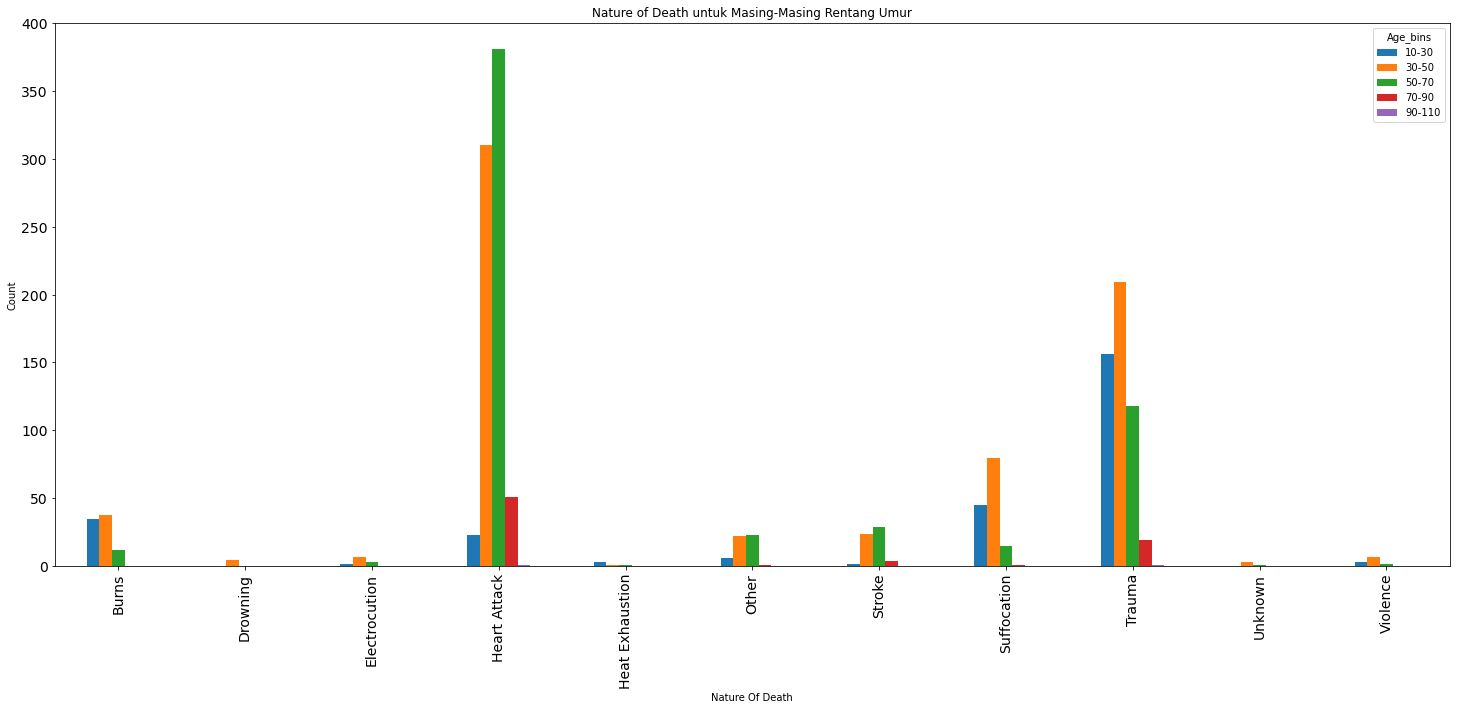

In [28]:
df1g['Nature Of Death'].unstack(level=1).plot(kind='bar', figsize=(25,10), fontsize=14)
plt.title('Nature of Death untuk Masing-Masing Rentang Umur')
plt.ylabel('Count')
plt.show()

## Faktor Penyebab  Pemadam Kebakaran yang Berumur 30-50 yang meninggal akibat Heart Attack

### Mengambil kolom untuk analisis

In [29]:
df2 = df1[(df1['Age_bins']=='30-50')&(df1['Nature Of Death']=='Heart Attack')]

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 2 to 2001
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Nature Of Death  310 non-null    object  
 1   Age              310 non-null    float64 
 2   Cause Of Death   308 non-null    object  
 3   Age_bins         310 non-null    category
dtypes: category(1), float64(1), object(2)
memory usage: 10.2+ KB


Pada Kolom Age masih terdapat missing value, sehingga perlu membuang missing value

In [31]:
df2.dropna(inplace=True)

<ipython-input-31-f66736151044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [32]:
count = pd.DataFrame(df2['Cause Of Death'].value_counts())

In [33]:
count['presentase'] = (count['Cause Of Death']/count['Cause Of Death'].sum())*100

In [34]:
count.style.highlight_max(color = 'pink', axis=0)

,Cause Of Death,presentase
Stress/Overexertion,305,99.025974
Other,2,0.649351
Exposure,1,0.324675


## Faktor Penyebab  Pemadam Kebakaran yang Berumur 50-70 yang meninggal akibat Heart Attack

In [35]:
df3 = df1[(df1['Age_bins']=='50-70')&(df1['Nature Of Death']=='Heart Attack')]

In [36]:
len(df3)

381

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 1 to 2002
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Nature Of Death  381 non-null    object  
 1   Age              381 non-null    float64 
 2   Cause Of Death   381 non-null    object  
 3   Age_bins         381 non-null    category
dtypes: category(1), float64(1), object(2)
memory usage: 12.5+ KB


Berdasarkan informasi di atas dapat dilihat bahwa tidak ada missing value, sehingga tidak perlu membuang null

In [38]:
count2 = pd.DataFrame(df3['Cause Of Death'].value_counts())

In [39]:
count2['presentase'] = (count2['Cause Of Death']/count2['Cause Of Death'].sum())*100

In [40]:
count2.style.highlight_max(color = 'yellow', axis=0)

,Cause Of Death,presentase
Stress/Overexertion,377,98.950131
Smoke,2,0.524934
Unknown,2,0.524934


## Kesimpulan

Berdasarkan bar chart di atas dapat dilihat bahwa kematian pemadam kebakaran yang paling banyak disebabkan oleh serangan jantung.Pemadam kebakaran yang paling banyak meninggal akibat penyakit ini, yaitu mereka yang berada di rentang usia 50-70 tahun mencapai 381 orang. Hal ini selaras dengan orang yang biasanya terkena serangan jantung pada umumnya berusia 50 tahun ke atas. Terhitung 377 dari 381 pemadam kebakaran yang berada pada rentang usia 50-70 yang meninggal karena serangan jantung dipicu oleh adanya stress/overexertion. Stress merupakan salah satu faktor penyebab serangan jantung yang tidak dapat dihindari. Dilansir melalui Medical News Today, stres yang berkelanjutan dapat berdampak fatal karena menyebabkan penyempitan pembuluh darah yang mengarah pada gagal jantung. Ditambah lagi paparan asap, jelaga dan bahan kimia di udara akibat kebakaran yang tinggi ikut menyebabkan masalah jantung.

Selain itu, tidak menutup kemungkinan juga bagi pemadam kebakaran yang masih tergolong di bawah umur 50 tahun (berumur 30-50 tahun) juga bisa meninggal akibat serangan jantung. Hal ini dibuktikan dengan jumlah pemadam kebakaran yang berusia 30-50 yang meninggal akibat serangan jantung juga tidak kalah banyak, yaitu sebesar 310 orang. Hampir seluruh pemadam kebakaran yang berusia 30-50 yang meninggal akibat serangan jantung dipicu dengan adanya stress/overexertion (99.03%). Hal ini selaras dengan salah satu penyebab serangan jantung di usia muda, yaitu stress. Stress dapat meningkatkan risiko terkena serangan jantung di usia muda karena dapat memicu peningkatan tekananan darah dan menurunkan kolesterol baik yang berfungsi untuk menjaga kesehatan jantung. 

Saran : untuk dapat mengurangi risiko kematian pemadam kebakaran akibat serangan jantung, sebaiknya sebelum menjadi pemadam kebakaran/volunteer pemadam kebakaran diadakan tes kesehatan jantung untuk masing-masing orang karena apabila orang tersebut mempunyai penyakit jantung risiko meninggalnya akan lebih tinggi ketika melakukan pekerjaan berat, terutama dalam saat kondisi stress karena dapat memicu peningkatan hormon adrenalin dan hormon terkait yang mempengaruhi sistem kardiovaskular 

Sumber : 
1. alodokter.com/waspadai-berbagai-penyebab-serangan-jantung-di-usia-muda 
2. https://health.kompas.com/read/2020/08/03/103518868/10-penyebab-penyakit-jantung-yang-harus-diwaspadai?page=all
3. https://www.voaindonesia.com/a/mengapa-banyak-petugas-damkar-tewas-akibat-serangan-jantung-saat-bertugas-/4597502.html